In [2]:
import os
import numpy as np
import random

def folder_list(path,label):
    '''
    PARAMETER PATH IS THE PATH OF YOUR LOCAL FOLDER
    '''
    filelist = os.listdir(path)
    review = []
    for infile in filelist:
        file = os.path.join(path,infile)
        r = read_data(file)
        r.append(label)
        review.append(r)
    return review


def read_data(file):
    '''
    Read each file into a list of strings.
    Example:
    ["it's", 'a', 'curious', 'thing', "i've", 'found', 'that', 'when', 'willis', 'is', 'not', 'called', 'on',
    ...'to', 'carry', 'the', 'whole', 'movie', "he's", 'much', 'better', 'and', 'so', 'is', 'the', 'movie']
    '''
    f = open(file)
    lines = f.read().split(' ')
    symbols = '${}()[].,:;+-*/&|<>=~" '
    words = map(lambda Element: Element.translate(str.maketrans("", "", symbols)).strip(), lines)
    words = filter(None, words)
    return list(words)


def load_and_shuffle_data():
    '''
    pos_path is where you save positive review data.
    neg_path is where you save negative review data.
    '''
    pos_path = "/Users/ryanjang123/Documents/hw3/data/pos/"
    neg_path = "/Users/ryanjang123/Documents/hw3/data/neg/"

    pos_review = folder_list(pos_path,1)
    neg_review = folder_list(neg_path,-1)

    review = pos_review + neg_review
    random.shuffle(review)
    return review

# Taken from http://web.stanford.edu/class/cs221/ Assignment #2 Support Code
def dotProduct(d1, d2):
    """
    @param dict d1: a feature vector represented by a mapping from a feature (string) to a weight (float).
    @param dict d2: same as d1
    @return float: the dot product between d1 and d2
    """
    if len(d1) < len(d2):
        return dotProduct(d2, d1)
    else:
        return sum(d1.get(f, 0) * v for f, v in d2.items())

def increment(d1, scale, d2):
    """
    Implements d1 += scale * d2 for sparse vectors.
    @param dict d1: the feature vector which is mutated.
    @param float scale
    @param dict d2: a feature vector.

    NOTE: This function does not return anything, but rather
    increments d1 in place. We do this because it is much faster to
    change elements of d1 in place than to build a new dictionary and
    return it.
    """
    for f, v in d2.items():
        d1[f] = d1.get(f, 0) + v * scale


In [23]:
#6 Count words with using Counter
from collections import Counter

def Countvect(example):
    
    """
    input:
    example: list of words
    
    returns:
    vocab: dictionary of word count
    """
    temp = []
    for j in example:
        temp.append(Counter(j))
    
    return temp

In [24]:
#7 

df = load_and_shuffle_data()

In [4]:
df[1][-1]

1

In [25]:
temp = []
for i in range(len(df)):
    temp.append(df[i][-1])
    del df[i][-1]
    
wordCounts = Countvect(df)

In [26]:
X_train = wordCounts[:1500]
X_test =  wordCounts[1500:2000]
y_train = temp[:1500]
y_test = temp[1500:2000]
    

In [27]:
y_train[1]

1

In [28]:
dotProduct(X_train[1],X_train[1])

2983

In [9]:
import time

In [29]:
# 8
def Pegasos(lamb,X, y,num_epoch = 10):
    start_time = time.time()
    n = len(X)
    w = {}
    t= 0
    index = np.arange(n)
    for epoch in range(num_epoch):
        np.random.seed(1)
        np.random.shuffle(index)
        for j in index:
            t += 1
            hyp = 1/(t*lamb)
            dot = y[j]*dotProduct(w,X[j])
            increment(w, -hyp*lamb, w)

            if dot<1:
                increment(w,hyp*y[j],X[j])
    print("--- %s seconds ---" % (time.time() - start_time))
    return w

In [11]:
# Run
lamb = 1
w = Pegasos(lamb,X_train,y_train)
ls = []

n = len(X_test)
hinge_sum = 0
for i in range(len(X_test)):
    temp = y_test[i]*dotProduct(w,X_test[i])
    hinge_sum += max(0,temp)

hinge_sum = hinge_sum/n

J = (lamb/2)*dotProduct(w,w) + hinge_sum
    

J

--- 80.33716702461243 seconds ---


0.9717153577777513

In [12]:
dotProduct(w,w)

0.31613658222216545

In [30]:
#9
def Pegasos_updated(lamb,X, y,num_epoch = 10):
    start_time = time.time()
    n = len(X)
    st= 1
    Wt = {}
    w= {}
    t= 1
    index = np.arange(n)
    for epoch in range(num_epoch):
        np.random.seed(1)
        np.random.shuffle(index)
        for j in index:
            t +=1 
            hyp = 1/(lamb*t)
            st = (1- hyp * lamb)*st
            if (y[j]*dotProduct(Wt,X[j])) < 1/st:
                increment(Wt,1/st*hyp*y[j],X[j])
    w = {}
    increment(w, st, Wt)
    print("--- %s seconds ---" % (time.time() - start_time))
    return w


In [31]:
#10
# Comparison with non update and update
# Pegasos_updated brings much faster result
w1 = Pegasos(lamb,X_train,y_train)
w2 = Pegasos_updated(lamb,X_train,y_train)


--- 106.47761011123657 seconds ---
--- 2.0370259284973145 seconds ---


In [32]:
# same value for each
w1['there'], w2['there']

(-0.4050497984744034, -0.40502279695460053)

In [33]:

lamb = 1
n = len(X_train)
w = Pegasos_updated(lamb,X_train,y_train)
hinge_sum = 0
for i in range(len(X_train)):
    temp = y_train[i]*dotProduct(w,X_train[i])
    hinge_sum += max(0,temp)

hinge_sum = hinge_sum/n

J = (lamb/2)*dotProduct(w,w) + hinge_sum
    


J

--- 1.2193500995635986 seconds ---


1.0643731002042376

In [35]:
# 11 Classification Error
def Classification_Error(w,X,y):
    sum = 0
    for i in range(len(X)):
        temp1 = np.sign(dotProduct(w,X[i]))
        temp2 = np.sign(y[i])
        if temp1 != temp2:
            sum += 1
            
    return sum/len(X)

In [45]:
# 12
lambdas = [0.00001, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 10]
loss = []
n = len(X_train)
for lamb in lambdas:
    w = Pegasos_updated(lamb,X_train,y_train, num_epoch = 100)
    ls = Classification_Error(w, X_test,y_test)
    loss.append(ls)
print(lambdas)
print(loss)

loss = np.array(loss)
print(lambdas[np.argmin(loss)])

--- 7.53509783744812 seconds ---
--- 7.444853067398071 seconds ---
--- 7.379491806030273 seconds ---
--- 7.397494077682495 seconds ---
--- 7.406336069107056 seconds ---
--- 7.4966349601745605 seconds ---
--- 8.060797929763794 seconds ---
--- 8.73254919052124 seconds ---
--- 11.893277883529663 seconds ---
--- 14.192185163497925 seconds ---
[1e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 10]
[0.166, 0.172, 0.176, 0.174, 0.162, 0.19, 0.174, 0.168, 0.168, 0.284]
0.005


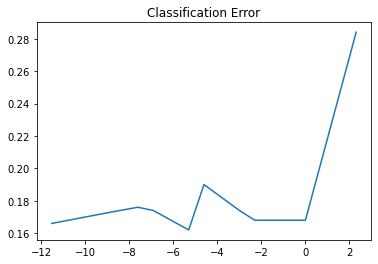

In [46]:

import matplotlib.pyplot as plt
plt.title("Classification Error")
plt.plot(np.log(lambdas),loss)
plt.show()

In [47]:
#zoom in
lambdas = np.linspace(0.00001,0.1,9)
loss = []
n = len(X_train)
for lamb in lambdas:
    w = Pegasos_updated(lamb,X_train,y_train, num_epoch = 100)
    ls = Classification_Error(w, X_test,y_test)
    loss.append(ls)
print(lambdas)
print(loss)

loss = np.array(loss)
print(lambdas[np.argmin(loss)])

--- 17.768425941467285 seconds ---
--- 18.07559323310852 seconds ---
--- 18.74891495704651 seconds ---
--- 18.856421947479248 seconds ---
--- 19.273058891296387 seconds ---
--- 19.457358837127686 seconds ---
--- 19.82334804534912 seconds ---
--- 20.14846181869507 seconds ---
--- 20.47686767578125 seconds ---
[1.000000e-05 1.250875e-02 2.500750e-02 3.750625e-02 5.000500e-02
 6.250375e-02 7.500250e-02 8.750125e-02 1.000000e-01]
[0.166, 0.164, 0.158, 0.16, 0.164, 0.158, 0.166, 0.16, 0.168]
0.025007500000000002


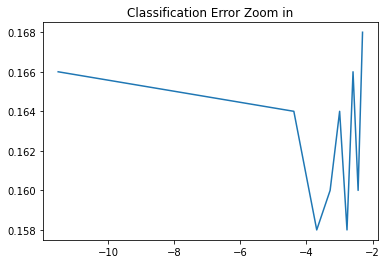

In [48]:
import matplotlib.pyplot as plt
plt.title("Classification Error Zoom in")
plt.plot(np.log(lambdas),loss)
plt.show()

In [39]:
#13

w = Pegasos_updated(lambdas[np.argmin(loss)],X_train,y_train, num_epoch = 10)
m = len(X_test)
store = []

for i in range(m):
    score = dotProduct(w,X_test[i])
    store.append(score)




--- 2.1302011013031006 seconds ---


In [40]:
import operator
enumerate_object = enumerate(store)
sorted_pairs = sorted(enumerate_object, key=operator.itemgetter(1))

sorted_indices = []
for index, element in sorted_pairs:
    sorted_indices.append(index)


In [41]:
a1 = sorted_indices[:100]
a2 = sorted_indices[100:200]
a3 = sorted_indices[200:300]
a4 = sorted_indices[300:400]
a5 = sorted_indices[400:500]


ind = [a1,a2,a3,a4,a5]
clust_list1 = []
clust_list2 = []
for a in ind:
    temp1 = []
    temp2 = []
    for i in a:
        temp1.append(X_test[i])
        temp2.append(y_test[i])
    clust_list1.append(temp1)
    clust_list2.append(temp2)


In [42]:
percentage_error = []
for x,y in zip(clust_list1,clust_list2):
    ls = Classification_Error(w, x,y)
    percentage_error.append(ls)

[0.04, 0.22, 0.43, 0.16, 0.03]


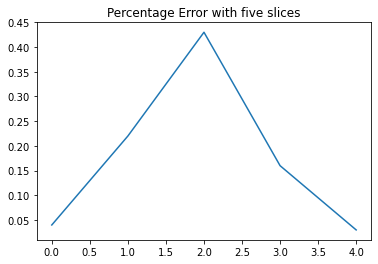

In [43]:
print(percentage_error)
# The percentage error seems to get lower as the magnitude of score increases
plt.title('Percentage Error with five slices')
plt.plot(percentage_error)

In [50]:
# 14 optional
def error_sample(w,X,y):
    s = 0
    for i in range(len(X)):
        temp1 = np.sign(dotProduct(w,X[i]))
        temp2 = np.sign(y[i])
        if temp1 != temp2:
            if s == 0:
                x = X[i]
            if s == 1:
                y = X[i]
                break
            s += 1
    return x, y

In [53]:
x1_wrong,x2_wrong = error_sample(w,X_train,y_train)
x1_wrong

Counter({'this': 4,
         'is': 4,
         'not': 6,
         'a': 11,
         'simple': 4,
         'plan': 2,
         'about': 3,
         'finding': 1,
         'plane': 1,
         'load': 1,
         'of': 16,
         'money': 4,
         'and': 12,
         'getting': 1,
         'away': 1,
         'with': 2,
         'the': 24,
         'cash': 1,
         'more': 2,
         'parable': 1,
         'greed': 4,
         'how': 3,
         'can': 2,
         'become': 2,
         'bane': 1,
         'your': 1,
         'life': 1,
         'yes': 1,
         'there': 2,
         'are': 3,
         'elements': 1,
         '?': 1,
         "fargo'": 1,
         'here': 1,
         'snow': 1,
         'cold': 1,
         'although': 2,
         'as': 3,
         'vivid': 1,
         'in': 4,
         'blood': 2,
         'gore': 1,
         'department': 1,
         'it': 3,
         'shows': 1,
         'set': 1,
         'chain': 1,
         'events': 1,
         'leading': 

In [52]:
wx1 = {}
wx2 = {}
for key1,key2 in zip(x1_wrong.keys(),x2_wrong.keys()):
    wx1[key1] = abs(x1_wrong[key1]*w[key1])
    wx2[key2] = abs(x2_wrong[key2]*w[key2])

    

In [33]:
wx1

{"i've": 0.4692238425564691,
 'always': 0.18129103007863592,
 'been': 0.1492984953588758,
 'a': 0.9473345003128757,
 'kevin': 0.16529476271875632,
 'kline': 0.29326490159779317,
 'fan': 0.03376989775974591,
 'silverado': 0.0071094521599465044,
 'fish': 0.021328356479839484,
 'called': 0.023105719519826165,
 'wanda': 0.028437808639786,
 'pirates': 0.0017773630399866274,
 'of': 0.20261938655845957,
 'penzance': 0.0071094521599465044,
 'and': 3.172593026376128,
 'even': 0.826473813593779,
 'his': 0.5438730902358972,
 'hamlet': 0.010664178239919763,
 'on': 0.7607113811142777,
 "pbs'": 0.0071094521599465044,
 'great': 0.6611790508750246,
 'performances': 0.17062685183871595,
 'the': 4.427411332606703,
 'minute': 0.10130969327923761,
 'i': 1.0859688174318336,
 'saw': 0.026660445599799413,
 'trailer': 0.10664178239919753,
 'for': 0.35547260799732594,
 'this': 0.29326490159779606,
 'film': 0.23105719519826398,
 'resolved': 0.019550993439852907,
 'to': 0.6753979551949173,
 'see': 0.526099459836

In [34]:
wx1_sorted = {k: v for k, v in sorted(wx1.items(), key=lambda item: item[1])}
wx2_sorted = {k: v for k, v in sorted(wx2.items(), key=lambda item: item[1])}

In [35]:
wx1_sorted
# lots of weight is given to very uncommon word making the prediction wrong

{'masculinity': 9.710103381829195e-18,
 'identifying': 1.136792591043418e-17,
 'preference': 1.3262580228839877e-17,
 'howard': 2.8893478355686874e-17,
 'exploit': 3.291961878229898e-17,
 'literary': 4.002457247632034e-17,
 'wow': 4.784002153974384e-17,
 'sexual': 0.00177736303998656,
 'condescending': 0.0017773630399866198,
 'pirates': 0.0017773630399866274,
 'cinemas': 0.0017773630399866287,
 'punched': 0.0017773630399866298,
 'moves': 0.0017773630399866315,
 'benefits': 0.0017773630399866489,
 'conclusion': 0.0017773630399866831,
 'straight': 0.0035547260799732375,
 'frantically': 0.0035547260799732396,
 'genuinely': 0.0035547260799732496,
 'hounded': 0.00355472607997326,
 'interrupt': 0.003554726079973261,
 'gumption': 0.0035547260799732613,
 'poetic': 0.003554726079973278,
 "he's": 0.003554726079973474,
 'twothirds': 0.005332089119959859,
 'machinations': 0.0053320891199598605,
 'reporter': 0.007109452159946488,
 'silverado': 0.0071094521599465044,
 'penzance': 0.00710945215994650

In [6]:
# 21
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.spatial
import functools

%matplotlib inline

In [7]:
### Kernel function generators
def linear_kernel(X1, X2):
    """
    Computes the linear kernel between two sets of vectors.
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
    Returns:
        matrix of size n1xn2, with x1_i^T x2_j in position i,j
    """
    return np.dot(X1,np.transpose(X2))
 
def RBF_kernel(X1,X2,sigma=1):
    """
    Computes the RBF kernel between two sets of vectors   
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        sigma - the bandwidth (i.e. standard deviation) for the RBF/Gaussian kernel
    Returns:
        matrix of size n1xn2, with exp(-||x1_i-x2_j||^2/(2 sigma^2)) in position i,j
    """
    #TODO
#     n1 = np.shape(X1)[0]
#     n2 = np.shape(X2)[0]
#     R = np.zeros((n1,n2))
#     for i in range(n1):
#         for j in range(n2):
#             R[i,j] = np.exp(-scipy.spatial.distance.cdist(X1[i,:].reshape(-1,1),X2[j,:].reshape(-1,1),'sqeuclidean')/(2*(sigma)**2))
    R= np.exp(-scipy.spatial.distance.cdist(X1, X2, 'sqeuclidean') / (2*sigma **2))
    return R
    
    
def polynomial_kernel(X1, X2, offset, degree):
    """
    Computes the inhomogeneous polynomial kernel between two sets of vectors
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        offset, degree - two parameters for the kernel
    Returns:
        matrix of size n1xn2, with (offset + <x1_i,x2_j>)^degree in position i,j
    """
    #TODO
    n1 = np.shape(X1)[0]
    n2 = np.shape(X2)[0]
    P = np.zeros((n1,n2))
    for i in range(n1):
        for j in range(n2):
            P[i,j] = (offset+np.dot(X1[i,:],X2[j,:]))**(degree)
    
    return P
    


In [8]:
#22
x = np.array([-4,-1,0,2]).reshape(-1,1)
L = linear_kernel(x, x)
print(L)

[[16  4  0 -8]
 [ 4  1  0 -2]
 [ 0  0  0  0]
 [-8 -2  0  4]]


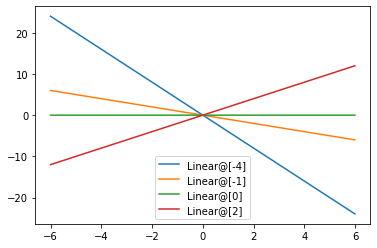

In [9]:
#23
y = np.array([2,0,3,5]).reshape(-1,1)

plot_step = .01
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# Linear kernel
y = linear_kernel(prototypes, xpts) 
for i in range(len(prototypes)):
    label = "Linear@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 

In [10]:
print(y)

[[ 24.    23.96  23.92 ... -23.88 -23.92 -23.96]
 [  6.     5.99   5.98 ...  -5.97  -5.98  -5.99]
 [ -0.    -0.    -0.   ...   0.     0.     0.  ]
 [-12.   -11.98 -11.96 ...  11.94  11.96  11.98]]


In [11]:
# polynomial for a=1 , d= 3
y_poly = polynomial_kernel(x, xpts, 1, 3)
print(y_poly)

[[ 1.56250000e+04  1.55501199e+04  1.54754795e+04 ... -1.19775519e+04
  -1.20404811e+04 -1.21036303e+04]
 [ 3.43000000e+02  3.41532099e+02  3.40068392e+02 ... -1.22763473e+02
  -1.23505992e+02 -1.24251499e+02]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [-1.33100000e+03 -1.32375319e+03 -1.31653274e+03 ...  2.16672018e+03
   2.17678234e+03  2.18687559e+03]]


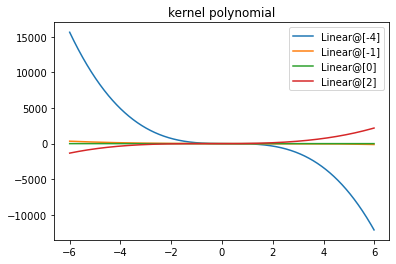

In [12]:
 
for i in range(len(x)):
    label = "Linear@"+str(x[i,:])
    plt.plot(xpts, y_poly[i,:], label=label)
plt.title('kernel polynomial')
plt.legend(loc = 'best')
plt.show() 

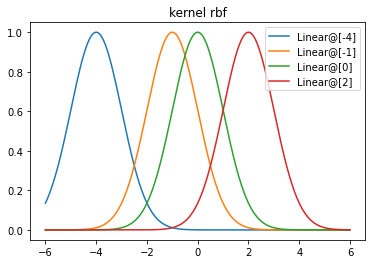

In [13]:
# RBF
sigma = 1
y_rbf= RBF_kernel(x,xpts,sigma)
for i in range(len(x)):
    label = "Linear@"+str(x[i,:])
    plt.plot(xpts, y_rbf[i,:], label=label)
plt.title('kernel rbf')
plt.legend(loc = 'best')
plt.show() 

In [14]:
#24
class Kernel_Machine(object):
    def __init__(self, kernel, training_points, weights):
        """
        Args:
            kernel(X1,X2) - a function return the cross-kernel matrix between rows of X1 and rows of X2 for kernel k
            training_points - an nxd matrix with rows x_1,..., x_n
            weights - a vector of length n with entries alpha_1,...,alpha_n
        """

        self.kernel = kernel
        self.training_points = training_points
        self.weights = weights
        
    def predict(self, X):
        """
        Evaluates the kernel machine on the points given by the rows of X
        Args:
            X - an nxd matrix with inputs x_1,...,x_n in the rows
        Returns:
            Vector of kernel machine evaluations on the n points in X.  Specifically, jth entry of return vector is
                Sum_{i=1}^R alpha_i k(x_j, mu_i)
        """
        # TODO
        n = np.shape(X)[0]
        
        vec = np.dot(self.weights.T,self.kernel(self.training_points,X))
        
        
        
        
        
        return vec.T
    

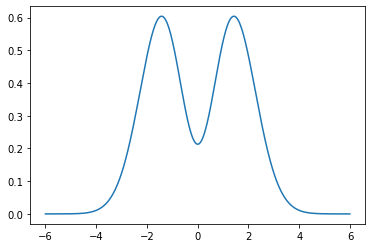

In [15]:
prototypes = np.array([-1,0,1]).reshape(-1,1)
weights = np.array([1,-1,1]).reshape(-1,1)
plot_step = .01
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)

ker_machine = Kernel_Machine(RBF_kernel,prototypes,weights)
pred = ker_machine.predict(xpts)


plt.plot(xpts, pred)

In [16]:
# 25
data_train,data_test = np.loadtxt("krr-train.txt"),np.loadtxt("krr-test.txt")
x_train, y_train = data_train[:,0].reshape(-1,1),data_train[:,1].reshape(-1,1)
x_test, y_test = data_test[:,0].reshape(-1,1),data_test[:,1].reshape(-1,1)

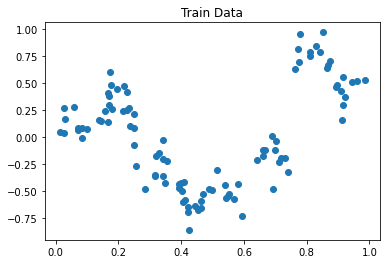

In [17]:
plt.title('Train Data')
plt.scatter(x_train,y_train)
plt.show()

In [18]:
def train_kernel_ridge_regression(X, y, kernel, l2reg):
    # TODO
    alpha = np.linalg.inv(l2reg*np.eye(np.shape(X)[0])+kernel(X,X))@y
    
    return Kernel_Machine(kernel, X, alpha)

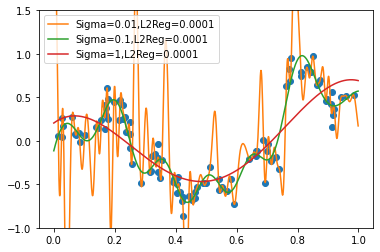

In [19]:
# 27
# 0.1 seems to show the best result
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
l2reg = 0.0001
for sigma in [.01,.1,1]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

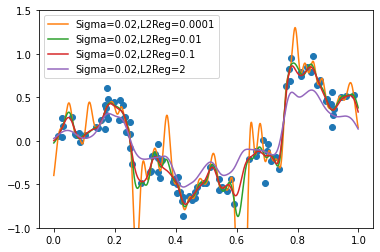

In [20]:
# 28
# As lamb -> inf, it slowly starts to misrepresent the data pattern
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
sigma= .02
for l2reg in [.0001,.01,.1,2]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

In [21]:
# 29
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin

class KernelRidgeRegression(BaseEstimator, RegressorMixin):  
    """sklearn wrapper for our kernel ridge regression"""
     
    def __init__(self, kernel="RBF", sigma=1, degree=2, offset=1, l2reg=1):        
        self.kernel = kernel
        self.sigma = sigma
        self.degree = degree
        self.offset = offset
        self.l2reg = l2reg 

    def fit(self, X, y=None):
        """
        This should fit classifier. All the "work" should be done here.
        """
        if (self.kernel == "linear"):
            self.k = linear_kernel
        elif (self.kernel == "RBF"):
            self.k = functools.partial(RBF_kernel, sigma=self.sigma)
        elif (self.kernel == "polynomial"):
            self.k = functools.partial(polynomial_kernel, offset=self.offset, degree=self.degree)
        else:
            raise ValueError('Unrecognized kernel type requested.')
        
        self.kernel_machine_ = train_kernel_ridge_regression(X, y, self.k, self.l2reg)

        return self

    def predict(self, X, y=None):
        try:
            getattr(self, "kernel_machine_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")

        return(self.kernel_machine_.predict(X))

    def score(self, X, y=None):
        # get the average square error
        return(((self.predict(X)-y)**2).mean()) 

In [22]:
from sklearn.model_selection import GridSearchCV,PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error,make_scorer
import pandas as pd
    
test_fold = [-1]*len(x_train) + [0]*len(x_test)   #0 corresponds to test, -1 to train
predefined_split = PredefinedSplit(test_fold=test_fold)

In [23]:
param_grid = [{'kernel': ['RBF'],'sigma':[.1,1,10], 'l2reg': np.exp2(-np.arange(-5,5,1))},
              {'kernel':['polynomial'],'offset':[-1,0,1], 'degree':[2,3,4],'l2reg':[10, .1, .01] },
              {'kernel':['linear'],'l2reg': [10,1,.01]}]
kernel_ridge_regression_estimator = KernelRidgeRegression()
grid = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False),
                    return_train_score=True
                   )
grid.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test)))

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=KernelRidgeRegression(),
             param_grid=[{'kernel': ['RBF'],
                          'l2reg': array([32.    , 16.    ,  8.    ,  4.    ,  2.    ,  1.    ,  0.5   ,
        0.25  ,  0.125 ,  0.0625]),
                          'sigma': [0.1, 1, 10]},
                         {'degree': [2, 3, 4], 'kernel': ['polynomial'],
                          'l2reg': [10, 0.1, 0.01], 'offset': [-1, 0, 1]},
                         {'kernel': ['linear'], 'l2reg': [10, 1, 0.01]}],
             return_train_score=True,
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [24]:
pd.set_option('display.max_rows', 20)
df = pd.DataFrame(grid.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df['mean_test_score'] = -df['mean_test_score']
df['mean_train_score'] = -df['mean_train_score']
cols_to_keep = ["param_degree", "param_kernel","param_l2reg" ,"param_offset","param_sigma",
        "mean_test_score","mean_train_score"]
df_toshow = df[cols_to_keep].fillna('-')
df_toshow.sort_values(by=["mean_test_score"])

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
27,-,RBF,0.0625,-,0.1,0.021270,0.023245
24,-,RBF,0.1250,-,0.1,0.022885,0.024608
21,-,RBF,0.2500,-,0.1,0.024845,0.026226
18,-,RBF,0.5000,-,0.1,0.026609,0.028110
15,-,RBF,1.0000,-,0.1,0.027562,0.030319
...,...,...,...,...,...,...,...
5,-,RBF,16.0000,-,10,0.167949,0.210743
2,-,RBF,32.0000,-,10,0.167995,0.210809
51,4,polynomial,0.1000,-1,-,0.188090,0.148359
30,2,polynomial,10.0000,-1,-,0.202746,0.239150


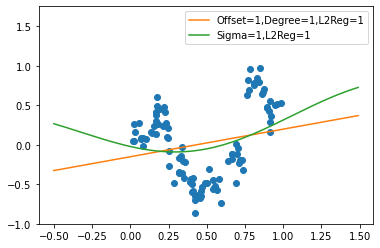

In [25]:
# 30
## Plot the best polynomial and RBF fits you found
plot_step = .01
xpts = np.arange(-.5 , 1.5, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
#Plot best polynomial fit
offset= 1
degree = 1
l2reg = 1
k = functools.partial(polynomial_kernel, offset=offset, degree=degree)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Offset="+str(offset)+",Degree="+str(degree)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
#Plot best RBF fit
sigma = 1
l2reg= 1
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.75)
plt.show()

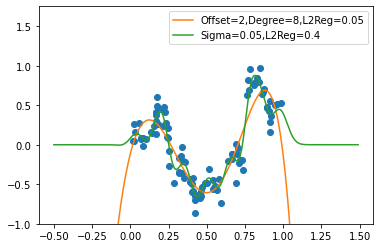

In [26]:
plot_step = .01
xpts = np.arange(-.5 , 1.5, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
#Plot best polynomial fit
offset= 2
degree = 8
l2reg = 0.05
k = functools.partial(polynomial_kernel, offset=offset, degree=degree)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Offset="+str(offset)+",Degree="+str(degree)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
#Plot best RBF fit
sigma = 0.05
l2reg= 0.4
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.75)
plt.show()

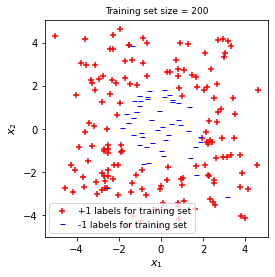

In [27]:
#32
# The data seems quadratically separable

# Load and plot the SVM data
#load the training and test sets
data_train,data_test = np.loadtxt("svm-train.txt"),np.loadtxt("svm-test.txt")
x_train, y_train = data_train[:,0:2], data_train[:,2].reshape(-1,1)
x_test, y_test = data_test[:,0:2], data_test[:,2].reshape(-1,1)

#determine predictions for the training set
yplus = np.ma.masked_where(y_train[:,0]<=0, y_train[:,0])
xplus = x_train[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_train[:,0]>0, y_train[:,0])
xminus = x_train[~np.array(yminus.mask)]

#plot the predictions for the training set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 

pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='r', label = '+1 labels for training set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 labels for training set')

ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('Training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()

In [28]:
from random import randint
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [29]:
# 33 Kernel Pegasos
def train_soft_svm(x, y, k, l2_reg=0.01):
    w = np.zeros(len(x))
    kernel = k(x, x)
    t = 0 # step number
    max_step = 1000
    
    while t < max_step:
        t += 1
        
        
        j = np.random.randint(1, len(x))
        hyp = 1 / (t*l2_reg)
        
            
        if y[j] * (kernel[j, :].T @ w) < 1:
            w[j] *= (1 - hyp * l2_reg)           
            w[j] += hyp * y[j]
        else:
            w[j] *= (1 - hyp * l2_reg)     
    
    return Kernel_Machine(k, x, w)

In [32]:
# 34

from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin

class KernelPeg(BaseEstimator, RegressorMixin):  
     
    def __init__(self, kernel="RBF", sigma=1, degree=2, offset=1, l2reg=1):        
        self.kernel = kernel
        self.sigma = sigma
        self.degree = degree
        self.offset = offset
        self.l2reg = l2reg 

    def fit(self, X, y=None):
        """
        This should fit classifier. All the "work" should be done here.
        """
        if (self.kernel == "linear"):
            self.k = linear_kernel
        elif (self.kernel == "RBF"):
            self.k = functools.partial(RBF_kernel, sigma=self.sigma)
        elif (self.kernel == "polynomial"):
            self.k = functools.partial(polynomial_kernel, offset=self.offset, degree=self.degree)
        else:
            raise ValueError('Unrecognized kernel type requested.')
        
        self.kernel_machine_ = train_kernel_ridge_regression(X, y, self.k, self.l2reg)

        return self

    def predict(self, X, y=None):
        try:
            getattr(self, "kernel_machine_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")

        return(self.kernel_machine_.predict(X))

    def score(self, X, y=None):
        # get the average square error
        return(((self.predict(X)-y)**2).mean()) 

In [39]:
Y_train = np.zeros(len(y_train)).reshape(-1,1)
Y_test = np.zeros(len(y_test)).reshape(-1,1)


for i,y in enumerate(y_train):
    if y > 0:
        Y_train[i] = 1
    else:
        Y_train[i] = 0
    

for i, y in enumerate(y_test):
    if y > 0:
        Y_test[i] = 1
    else:
        Y_test[i] = 0
  


In [40]:
from sklearn.model_selection import GridSearchCV,PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error,make_scorer
import pandas as pd
    
test_fold = [-1]*len(x_train) + [0]*len(x_test)   #0 corresponds to test, -1 to train
predefined_split = PredefinedSplit(test_fold=test_fold)

In [41]:
param_grid = [{'kernel': ['RBF'],'sigma':[.1,1,10], 'l2reg': np.exp2(-np.arange(-5,5,1))},
              {'kernel':['polynomial'],'offset':[-1,0,1], 'degree':[2,3,4],'l2reg':[10, .1, .01] },
              {'kernel':['linear'],'l2reg': [3400, 3450, 3500, 3550, 3600]}]

kernel_peg_estimator = KernelPeg()
grid = GridSearchCV(kernel_peg_estimator, 
                    param_grid,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False),
                    return_train_score=True
                   )
grid.fit(np.vstack((x_train,x_test)),np.vstack((Y_train,Y_test))) 

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=KernelPeg(),
             param_grid=[{'kernel': ['RBF'],
                          'l2reg': array([32.    , 16.    ,  8.    ,  4.    ,  2.    ,  1.    ,  0.5   ,
        0.25  ,  0.125 ,  0.0625]),
                          'sigma': [0.1, 1, 10]},
                         {'degree': [2, 3, 4], 'kernel': ['polynomial'],
                          'l2reg': [10, 0.1, 0.01], 'offset': [-1, 0, 1]},
                         {'kernel': ['linear'],
                          'l2reg': [3400, 3450, 3500, 3550, 3600]}],
             return_train_score=True,
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [166]:
pd.set_option('display.max_rows', 20)
df = pd.DataFrame(grid.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df['mean_test_score'] = -df['mean_test_score']
df['mean_train_score'] = -df['mean_train_score']
cols_to_keep = ["param_degree", "param_kernel","param_l2reg" ,"param_offset","param_sigma",
        "mean_test_score","mean_train_score"]
df_toshow = df[cols_to_keep].fillna('-')
df_toshow.sort_values(by=["mean_test_score"])

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
25,-,RBF,0.1250,-,1,0.048689,0.028563
28,-,RBF,0.0625,-,1,0.048848,0.025619
22,-,RBF,0.2500,-,1,0.050134,0.032449
19,-,RBF,0.5000,-,1,0.054382,0.038208
16,-,RBF,1.0000,-,1,0.063670,0.047748
...,...,...,...,...,...,...,...
60,-,linear,3550.0000,-,-,0.779614,0.757346
61,-,linear,3600.0000,-,-,0.779614,0.757371
40,3,polynomial,10.0000,0,-,0.788820,0.750575
43,3,polynomial,0.1000,0,-,0.788822,0.750575


In [167]:
df_toshow[df_toshow['param_kernel'] == 'linear'].sort_values(by='mean_test_score')

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
58,-,linear,3450.0,-,-,0.779614,0.757294
57,-,linear,3400.0,-,-,0.779614,0.757267
59,-,linear,3500.0,-,-,0.779614,0.757320
60,-,linear,3550.0,-,-,0.779614,0.757346
61,-,linear,3600.0,-,-,0.779614,0.757371


In [168]:
df_toshow[df_toshow['param_kernel'] == 'polynomial'].sort_values(by='mean_test_score')

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
56,4,polynomial,0.01,1,-,0.093197,0.075013
54,4,polynomial,0.01,-1,-,0.093197,0.075013
53,4,polynomial,0.10,1,-,0.093202,0.075013
51,4,polynomial,0.10,-1,-,0.093204,0.075013
50,4,polynomial,10.00,1,-,0.093607,0.075033
...,...,...,...,...,...,...,...
52,4,polynomial,0.10,0,-,0.394488,0.359140
55,4,polynomial,0.01,0,-,0.394488,0.359140
40,3,polynomial,10.00,0,-,0.788820,0.750575
43,3,polynomial,0.10,0,-,0.788822,0.750575


In [169]:
df_toshow[df_toshow['param_kernel'] == 'RBF'].sort_values(by='mean_test_score')

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
25,-,RBF,0.1250,-,1,0.048689,0.028563
28,-,RBF,0.0625,-,1,0.048848,0.025619
22,-,RBF,0.2500,-,1,0.050134,0.032449
19,-,RBF,0.5000,-,1,0.054382,0.038208
16,-,RBF,1.0000,-,1,0.063670,0.047748
...,...,...,...,...,...,...,...
12,-,RBF,2.0000,-,0.1,0.718983,0.311433
9,-,RBF,4.0000,-,0.1,0.741121,0.460736
6,-,RBF,8.0000,-,0.1,0.757479,0.581352
3,-,RBF,16.0000,-,0.1,0.767770,0.661250


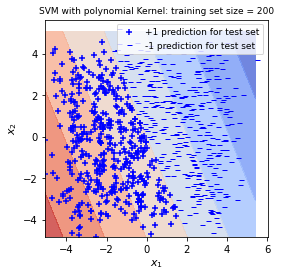

In [170]:
#35

# Linear Kernel

k = functools.partial(linear_kernel)
f = train_soft_svm(x_train, y_train, k, l2_reg=3400)

#determine the decision regions for the predictions
x1_min = min(x_test[:,0])
x1_max= max(x_test[:,0])
x2_min = min(x_test[:,1])
x2_max= max(x_test[:,1])
h=0.1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = f.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#determine the predictions for the test set
y_bar = f.predict (x_test) 
yplus = np.ma.masked_where(y_bar<=0, y_bar)
xplus = x_test[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_bar>0, y_bar)
xminus = x_test[~np.array(yminus.mask)]

#plot the learned boundary and the predictions for the test set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 
decision =ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='b', label = '+1 prediction for test set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 prediction for test set')
ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('SVM with polynomial Kernel: training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()

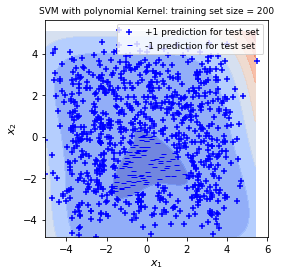

In [171]:
# polynomial kernel

 
sigma=1
k = functools.partial(polynomial_kernel, offset=1, degree=4)
f = train_soft_svm(x_train, y_train, k, l2_reg=10)

#determine the decision regions for the predictions
x1_min = min(x_test[:,0])
x1_max= max(x_test[:,0])
x2_min = min(x_test[:,1])
x2_max= max(x_test[:,1])
h=0.1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = f.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#determine the predictions for the test set
y_bar = f.predict (x_test) 
yplus = np.ma.masked_where(y_bar<=0, y_bar)
xplus = x_test[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_bar>0, y_bar)
xminus = x_test[~np.array(yminus.mask)]

#plot the learned boundary and the predictions for the test set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 
decision =ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='b', label = '+1 prediction for test set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 prediction for test set')
ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('SVM with polynomial Kernel: training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()

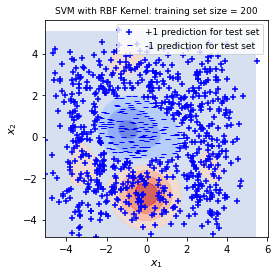

In [172]:
# RBF kernel
 
sigma=1
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_soft_svm(x_train, y_train, k, l2_reg=0.125)

#determine the decision regions for the predictions
x1_min = min(x_test[:,0])
x1_max= max(x_test[:,0])
x2_min = min(x_test[:,1])
x2_max= max(x_test[:,1])
h=0.1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = f.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#determine the predictions for the test set
y_bar = f.predict (x_test) 
yplus = np.ma.masked_where(y_bar<=0, y_bar)
xplus = x_test[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_bar>0, y_bar)
xminus = x_test[~np.array(yminus.mask)]

#plot the learned boundary and the predictions for the test set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 
decision =ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='b', label = '+1 prediction for test set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 prediction for test set')
ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('SVM with RBF Kernel: training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()